<a href="https://colab.research.google.com/github/konarksharma2001/pthon/blob/main/Machine_Learning_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1 Machine Learning

In [ ]:
Q.1 
Load the load_digit dataset from sklearn.datasets.
This dataset is made up of 1797 8x8 images. Each image, is of a hand-written digit. Therefore, each training example has 64 features (8X8) pixel values. Hence, the size of dataset is 1797X64.

Implement SVD in the following two ways:

(a)	Step-by-step

(b)	Using inbuilt SVD function in python


#SVD Without Using Inbuilt Function

1. Data Loading and Preprocessing

In [2]:
import numpy as np
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

2. Getting the Covariance Matrix

In [3]:
A=np.dot(X,X.T)
print(A.shape)

(1797, 1797)


3. Getting Eigen Values and Eigen Vectors

In [4]:
values, vectors = np.linalg.eig(np.sqrt(A))
values[:5]
print(values.shape)

(1797,)


4. Finding Explained Variances - Percentage of Contribution of each Eigen Value

In [5]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

0.9999999999999998 
 [0.8298325736820084, 0.02838753101693554, 0.02596526203796797, 0.022699658194926683, 0.01617372915581059, 0.010834340128454658, 0.008764847363960835, 0.007975617073340619, 0.006702174936296469, 0.006284250822298233, 0.004493512523589903, 0.00434065774711589, 0.0035930442744519487, 0.003313168319467957, 0.0028761790912303986, 0.00252695644713985, 0.002455632146802918, 0.0023036972328410446, 0.0018535635415163846, 0.0017761173045608913, 0.0016131340693859018, 0.0014626590658594941, 0.001408791931569151, 0.0013293406956602465, 0.0012708984532294075, 0.001083789469665145, 0.001014594108016187, 0.0009429322248775552, 0.0008644618172384941, 0.0007812791294473156, -0.000701930079376481, 0.0006707621196236192, 0.0006463379089265928, -0.0005475738221504404, 0.0005995418612318192, 0.000578959161487806, 0.0005333408484489875, 0.0005227601430284899, -0.00048139441833601574, -0.00048237894514586885, 0.0004582674958198289, -0.0003785051167933108, 0.0004020090382419935, 0.0003921

5. Plotting the contribution of each Eigen Value

Text(0.5, 0, 'Principal components')

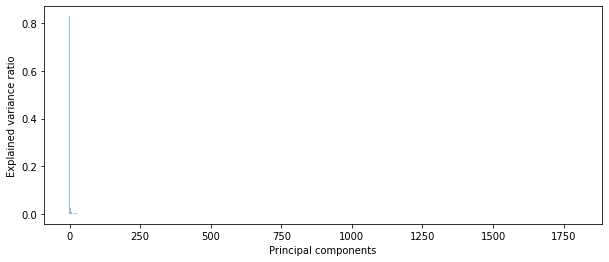

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.bar(range(1797), explained_variances, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')



6. Getting Sigma

In [8]:
sigma = np.zeros((1797, 2), int)

In [9]:
sigma[0,0]=np.sqrt(values[0])
sigma[1,1]=np.sqrt(values[1])
print(sigma)

[[303   0]
 [  0  56]
 [  0   0]
 ...
 [  0   0]
 [  0   0]
 [  0   0]]


7. Getting new feature projections

In [10]:
X_new=np.dot(vectors,sigma)
print(X_new)

[[ 6.75178218  0.07736643]
 [ 7.42485498 -0.7044582 ]
 [ 7.44977175 -0.6416403 ]
 ...
 [ 8.07481387 -0.93135778]
 [ 7.64122453  0.40306828]
 [ 8.01167519  0.02660079]]


#Using Inbuilt Function for SVD

In [11]:
from scipy.linalg import svd
u,s,v= svd(X)
sigma=np.diag(s)
print(s.shape)
print(u.shape)
X_new=np.dot(u[:,:64],sigma[:,:2])
print(X_new)

(64,)
(1797, 1797)
[[45.86127719 -1.19211574]
 [55.52967927  7.86176977]
 [55.8278837   6.91459576]
 ...
 [65.52698526 10.65872857]
 [58.60616587 -4.9112521 ]
 [64.44823101 -0.45551347]]


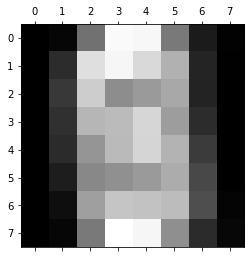

In [12]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)
image_reduced = svd.inverse_transform(X_reduced[0].reshape(1,-1))
image_reduced = image_reduced.reshape((8,8))
plt.matshow(image_reduced, cmap = 'gray')